Xây dựng mô hình hồi quy bằng tay.
File reg_model2.ipynb trong folder là xây dựng mô hình hồi quy dùng thư viện sklean.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# dữ liệu đầu vào
X = np.array([[73.5, 75.0, 76.5, 79.0, 81.5, 82.5, 84.0, 85.0, 87.5, 89.0, 90.0, 91.5]]).T
y = np.array([[1.49, 1.50, 1.51, 1.54, 1.58, 1.59, 1.60, 1.62, 1.64, 1.65, 1.66, 1.68]]).T


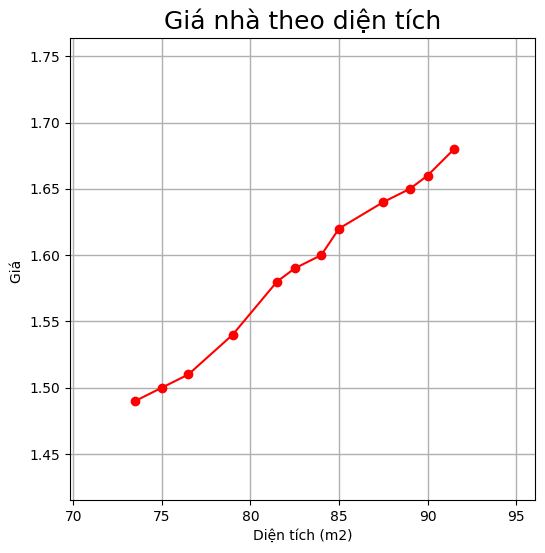

In [7]:
# trực quan hóa dữ liệu bằng đồ thị
def show_data(X, y, title, xlabel, ylabel):
    plt.figure(figsize=(6, 6))
    plt.plot(X, y, 'r-o', label="price")

    # xác định min, max
    X_min = np.min(X)
    X_max = np.max(X)
    y_min = np.min(y)
    y_max = np.max(y)

    plt.axis([X_min*0.95, X_max*1.05, y_min*0.95, y_max*1.05])
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(linewidth=1)
    plt.show()

show_data(X, y, "Giá nhà theo diện tích", "Diện tích (m2)", "Giá ")

In [48]:
# xác định tham số mô hình w[w0, w1]
def create_model(X, y):
    # tạo ma trận hệ số điều chỉnh (x0 = 1)
    x0 = np.ones((X.shape[0], 1))

    # ghép với ma trận X để thành ma trận X_ngang
    X_ngang = np.concatenate((x0, X), axis=1)
    X_ngang_T = X_ngang.T # ma trận chuyển vị của X_ngang

    A = np.linalg.pinv(np.dot(X_ngang_T, X_ngang))
    B = np.dot(X_ngang_T, y)

    w = np.dot(A, B)
    w0 = w[0]
    w1 = w[1]
    print(f"Mô hình HQTT: y = {w0[0]:.2f} + {w1[0]:.2f}*x1")
    return w0, w1


In [51]:
# thực thi mô hình
w0, w1 = create_model(X, y)
print(f"Với diện tích S = 70(m2) thì sẽ có giá p = {(w0[0] + w1[0]*70):.2f} (Tỷ VNĐ)")

Mô hình HQTT: y = 0.69 + 0.01*x1
Với diện tích S = 70(m2) thì sẽ có giá p = 1.45 (Tỷ VNĐ)
